In [410]:
from fastai.tabular.all import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [411]:
df = pd.read_csv('../datasets/final_df/crime_total.csv') #read in dataframe

In [412]:
df.dispatch_date = pd.to_datetime(df.dispatch_date) # make categoricals
df.zipcode = df.zipcode.astype(int)
df.year = df.dispatch_date.dt.year.astype(int)
df['month']= df.dispatch_date.dt.month.astype(int)

#df.to_csv('../datasets/final_df/crime_total.csv',index=False)

In [413]:
df['time_delta'] = df.index.values

In [414]:
list(df.columns)

['zipcode',
 'dispatch_date',
 'text_general_code_Aggravated Assault Firearm',
 'text_general_code_Aggravated Assault No Firearm',
 'text_general_code_All Other Offenses',
 'text_general_code_Arson',
 'text_general_code_Burglary Non-Residential',
 'text_general_code_Burglary Residential',
 'text_general_code_DRIVING UNDER THE INFLUENCE',
 'text_general_code_Disorderly Conduct',
 'text_general_code_Embezzlement',
 'text_general_code_Forgery and Counterfeiting',
 'text_general_code_Fraud',
 'text_general_code_Gambling Violations',
 'text_general_code_Liquor Law Violations',
 'text_general_code_Narcotic / Drug Law Violations',
 'text_general_code_Offenses Against Family and Children',
 'text_general_code_Other Assaults',
 'text_general_code_Other Sex Offenses (Not Commercialized)',
 'text_general_code_Prostitution and Commercialized Vice',
 'text_general_code_Public Drunkenness',
 'text_general_code_Rape',
 'text_general_code_Receiving Stolen Property',
 'text_general_code_Robbery Firearm

In [415]:
df = df.drop(columns = ['dispatch_date'])

In [416]:
crimecols = ['text_general_code_Aggravated Assault Firearm',
 'text_general_code_Aggravated Assault No Firearm',
 'text_general_code_All Other Offenses',
 'text_general_code_Arson',
 'text_general_code_Burglary Non-Residential',
 'text_general_code_Burglary Residential',
 'text_general_code_DRIVING UNDER THE INFLUENCE',
 'text_general_code_Disorderly Conduct',
 'text_general_code_Embezzlement',
 'text_general_code_Forgery and Counterfeiting',
 'text_general_code_Fraud',
 'text_general_code_Gambling Violations',
 'text_general_code_Liquor Law Violations',
 'text_general_code_Narcotic / Drug Law Violations',
 'text_general_code_Offenses Against Family and Children',
 'text_general_code_Other Assaults',
 'text_general_code_Other Sex Offenses (Not Commercialized)',
 'text_general_code_Prostitution and Commercialized Vice',
 'text_general_code_Public Drunkenness',
 'text_general_code_Rape',
 'text_general_code_Receiving Stolen Property',
 'text_general_code_Robbery Firearm',
 'text_general_code_Robbery No Firearm',
 'text_general_code_Theft from Vehicle',
 'text_general_code_Thefts',
 'text_general_code_Vagrancy/Loitering',
 'text_general_code_Vandalism/Criminal Mischief',
 'text_general_code_Weapon Violations','num_crimes','month','year', 'agi_code',
 'n_single_returns',
 'n_joint_returns',
 'num_dep',
 'agi',
 'total_wages',
 'salaries',
 'num_unemployment',
 'amt_unemployment',
 'num_tuition_tax',
 'amt_tuition_tax',
 'num_education_credit',
 'amt_education_credit',
 'num_schools']

cats = ['zipcode']
#const = df.columns.tolist().remove(cats)
const = [x for x in df.columns.tolist() if x not in cats]
const = [e for e in const if e not in crimecols]


In [417]:
const

['hour_0',
 'hour_1',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_2',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'num_art',
 'num_fm',
 'num_parks',
 'num_landmark',
 'Youth Center',
 'Zoo',
 'Theatre',
 'Social Services',
 'Sports Complex',
 'Recreation Building',
 'Recreation Center',
 'Museum',
 'Monument',
 'Ice Rink',
 'Historic',
 'Historic Landmark',
 'Garden',
 'Cultural',
 'num_housingcouncil',
 'num_nac_office',
 'num_nac',
 'num_pools',
 'num_spraygrounds',
 'num_playstreets',
 'num_playgrounds',
 'TYPE_SPECIFIC_ARCHDIOCESE',
 'TYPE_SPECIFIC_CHARTER',
 'TYPE_SPECIFIC_CONTRACTED',
 'TYPE_SPECIFIC_DISTRICT',
 'TYPE_SPECIFIC_PRIVATE',
 'text_general_code_Robbery',
 'text_general_code_Burglary',
 'text_general_code_Aggravated Assault',
 'num_community_programs',
 'time_delta']

In [418]:
dls = TabularDataLoaders.from_df(df, y_names="num_crimes",
    #cat_names = cats,
    cont_names = const,
    procs = [Categorify, FillMissing, Normalize])

In [419]:
dls

In [420]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))


In [421]:
splits

((#17753) [16906,16770,21044,21519,18551,12215,3009,1921,4631,16643...],
 (#4438) [17378,16241,8937,369,10519,4054,21577,15127,11281,18110...])

In [422]:
to = TabularPandas(df, procs=[Categorify, FillMissing,Normalize],#cat_names = cats,
                   cont_names = const,
                   y_names="num_crimes", splits=splits)


In [423]:
dls = to.dataloaders(bs=64)

In [424]:
dls.show_batch()

,hour_0,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_2,hour_20,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,num_art,num_fm,num_parks,num_landmark,Youth Center,Zoo,Theatre,Social Services,Sports Complex,Recreation Building,Recreation Center,Museum,Monument,Ice Rink,Historic,Historic Landmark,Garden,Cultural,num_housingcouncil,num_nac_office,num_nac,num_pools,num_spraygrounds,num_playstreets,num_playgrounds,TYPE_SPECIFIC_ARCHDIOCESE,TYPE_SPECIFIC_CHARTER,TYPE_SPECIFIC_CONTRACTED,TYPE_SPECIFIC_DISTRICT,TYPE_SPECIFIC_PRIVATE,text_general_code_Robbery,text_general_code_Burglary,text_general_code_Aggravated Assault,num_community_programs,time_delta,num_crimes
0,9.000000e+00,12.0,1.600000e+01,1.600000e+01,3.300000e+01,19.0,18.0,2.200000e+01,2.900000e+01,1.900000e+01,19.0,2.400000e+01,7.000000e+00,1.700000e+01,2.000000e+01,1.300000e+01,3.200000e+01,5.000000e+00,7.000000e+00,8.000000e+00,2.000000e+00,1.200000e+01,1.500000e+01,1.500000e+01,-2.110831e-07,-6.215017e-08,17.0,142.000000,-4.969428e-10,5.832519e-08,-3.190084e-09,1.000000e+00,-5.714480e-08,-2.304097e-10,-2.304097e-10,2.979460e-08,2.300458e-10,1.385627e-09,-5.073386e-09,8.143702e-09,2.658689e-08,-2.748201e-09,1.000000e+00,1.000000e+00,1.000000e+00,7.217855e-10,-3.437511e-09,-6.061539e-10,1.900000e+01,3.000000e+00,3.000000e+00,1.000000e+00,8.0,1.0,3.900000e+01,33.0,45.000001,181.000000,12332.999974,389.0
1,1.000000e+00,2.0,2.000000e+00,2.000000e+00,-2.679371e-08,1.0,2.0,1.000000e+00,5.248837e-08,-2.658300e-07,1.0,-6.894275e-08,1.000000e+00,2.550225e-07,-2.413955e-07,1.039996e-07,1.206389e-07,-5.366990e-08,-2.127605e-08,3.448163e-08,-4.732913e-09,1.023442e-07,4.000000e+00,2.000000e+00,-2.110831e-07,1.000000e+00,6.0,26.999999,-4.969428e-10,5.832519e-08,-3.190084e-09,-3.994930e-08,-5.714480e-08,-2.304097e-10,-2.304097e-10,2.979460e-08,2.300458e-10,1.385627e-09,-5.073386e-09,8.143702e-09,2.658689e-08,2.000000e+00,2.245657e-09,2.037222e-08,2.037222e-08,7.217855e-10,-3.437511e-09,-6.061539e-10,-5.460895e-08,-6.309734e-08,5.797667e-08,1.429364e-08,1.0,1.0,1.000000e+00,4.0,3.000000,34.000001,8867.999924,19.0
2,1.100000e+01,13.0,4.000000e+00,1.200000e+01,9.000000e+00,6.0,11.0,9.000000e+00,1.300000e+01,1.400000e+01,13.0,9.000000e+00,1.400000e+01,8.000000e+00,1.400000e+01,1.200000e+01,1.600000e+01,4.000000e+00,3.000000e+00,3.448163e-08,-4.732913e-09,4.000000e+00,7.000000e+00,6.000000e+00,4.000000e+00,1.000000e+00,19.0,182.999999,-4.969428e-10,5.832519e-08,-3.190084e-09,5.000000e+00,-5.714480e-08,-2.304097e-10,-2.304097e-10,1.000000e+00,2.300458e-10,1.385627e-09,-5.073386e-09,1.000000e+00,1.000000e+00,-2.748201e-09,2.245657e-09,2.000000e+00,2.000000e+00,7.217855e-10,-3.437511e-09,-6.061539e-10,-5.460895e-08,-6.309734e-08,3.000000e+00,2.000000e+00,10.0,7.0,3.000000e+01,25.0,30.999999,210.999999,6124.000117,212.0
3,7.000000e+00,3.0,5.000000e+00,4.000000e+00,5.000000e+00,6.0,8.0,8.000000e+00,1.000000e+01,4.000000e+00,8.0,2.000000e+00,3.000000e+00,5.000000e+00,4.000000e+00,6.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.448163e-08,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,8.000000e+00,-6.215017e-08,12.0,164.000000,-4.969428e-10,5.832519e-08,1.000000e+00,4.000000e+00,-5.714480e-08,-2.304097e-10,-2.304097e-10,1.000000e+00,2.300458e-10,1.385627e-09,-5.073386e-09,8.143702e-09,6.000000e+00,1.000000e+00,2.245657e-09,1.000000e+00,1.000000e+00,7.217855e-10,-3.437511e-09,-6.061539e-10,-5.460895e-08,1.000000e+00,3.000000e+00,1.429364e-08,3.0,3.0,1.000000e+01,20.0,8.000000,186.000000,18103.999868,103.0
4,2.000000e+00,1.0,1.000000e+00,6.000000e+00,2.000000e+00,1.0,3.0,2.000000e+00,6.000000e+00,9.000000e+00,5.0,3.000000e+00,5.280796e-08,3.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,-2.127605e-08,3.448163e-08,3.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,-2.110831e-07,1.000000e+00,8.0,87.999998,-4.969428e-10,5.832519e-08,-3.190084e-09,-3.994930e-08,-5.714480e-08,-2.304097e-10,-2.304097e-10,2.97

In [425]:
learn = tabular_learner(dls, metrics=rmse)


In [426]:
learn.fit_one_cycle(5)


epoch,train_loss,valid_loss,_rmse,time
0,5760.218262,2088.645752,45.701702,00:03
1,325.030121,84.464584,9.190462,00:03
2,260.215912,56.589066,7.522571,00:03
3,184.623062,51.636929,7.185884,00:03
4,197.497589,99.872169,9.993606,00:03


In [427]:
learn.show_results()

,hour_0,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_2,hour_20,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,num_art,num_fm,num_parks,num_landmark,Youth Center,Zoo,Theatre,Social Services,Sports Complex,Recreation Building,Recreation Center,Museum,Monument,Ice Rink,Historic,Historic Landmark,Garden,Cultural,num_housingcouncil,num_nac_office,num_nac,num_pools,num_spraygrounds,num_playstreets,num_playgrounds,TYPE_SPECIFIC_ARCHDIOCESE,TYPE_SPECIFIC_CHARTER,TYPE_SPECIFIC_CONTRACTED,TYPE_SPECIFIC_DISTRICT,TYPE_SPECIFIC_PRIVATE,text_general_code_Robbery,text_general_code_Burglary,text_general_code_Aggravated Assault,num_community_programs,time_delta,num_crimes,num_crimes_pred
0,0.547233,0.263357,-0.321197,-0.760565,0.158762,-0.785901,-0.215348,-0.565878,0.186173,-0.845895,-0.420187,0.059147,-0.959824,-0.457736,0.552130,0.186012,-0.513860,-0.939922,-0.872165,-0.843412,-0.871481,-0.333578,-0.493615,-0.671399,-0.572219,0.849741,0.125531,-0.053107,-0.244892,-0.148491,-0.452124,-0.038957,-0.094540,-0.147696,-0.147696,-0.177267,-0.210462,-0.147696,-0.147696,-0.369704,-0.462730,-0.407374,0.643007,-0.549121,-0.549121,-0.207484,-0.247481,-0.05635,-0.353264,1.655758,0.926296,-0.522135,-0.293432,0.356840,-0.168585,0.017274,0.210699,-0.105432,0.974079,90.0,78.687782
1,0.026976,-0.041665,-0.321197,-0.953130,0.926640,-0.018332,-0.215348,-0.369678,0.029279,-0.169758,-0.979949,-0.138339,-0.959824,-0.457736,-0.734526,0.186012,-0.513860,-0.479225,-0.872165,2.231272,-0.252724,-0.750473,1.117977,-1.112906,-0.315068,-1.006930,-0.756539,-0.746232,-0.244892,-0.148491,-0.452124,-0.038957,-0.514658,-0.147696,-0.147696,-0.368135,-0.210462,-0.147696,-0.147696,-0.369704,-0.462730,-0.407374,0.643007,0.668534,0.668534,-0.207484,-0.247481,-0.05635,-0.353264,-0.185552,-0.065444,0.901527,0.021481,0.356840,-0.077031,-0.066653,0.938403,-0.791870,0.801260,99.0,94.537880
2,-0.233153,-0.041665,-0.527656,-0.760565,0.350731,-0.402117,0.214259,-0.762077,-0.127615,-0.676861,-0.606774,0.651605,-0.959824,0.144858,-0.091198,0.672605,0.512675,0.902865,0.284057,0.386461,1.603547,-0.750473,0.427295,-0.229893,-0.572219,0.849741,0.125531,-0.053107,-0.244892,-0.148491,-0.452124,-0.038957,-0.094540,-0.147696,-0.147696,-0.177267,-0.210462,-0.147696,-0.147696,-0.369704,-0.462730,-0.407374,0.643007,-0.549121,-0.549121,-0.207484,4.729621,-0.05635,3.002524,1.655758,0.926296,-0.522135,-0.293432,0.356840,-0.351692,-0.066653,0.137929,0.097123,1.033613,113.0,111.689667
3,0.287104,-0.651709,1.124020,0.202263,0.158762,-0.018332,1.073471,0.611322,1.284432,0.506379,-0.047012,0.059147,0.536138,-0.457736,0.981015,0.429308,0.512675,2.745652,0.284057,0.386461,0.366033,0.083318,1.808659,1.315380,-0.186493,-1.006930,-0.315504,-0.113907,-0.244892,-0.148491,-0.452124,-0.657014,-0.514658,-0.147696,-0.147696,-0.368135,-0.210462,-0.147696,-0.147696,-0.369704,-0.462730,-0.407374,0.643007,0.668534,0.668534,-0.207484,-0.247481,-0.05635,-0.353264,-0.185552,0.430426,-0.522135,1.596051,-0.041261,0.930058,0.688695,0.865633,-0.161697,-0.842867,176.0,167.468369
4,-0.753411,-0.346687,-0.321197,-0.760565,-0.033208,-0.402117,-0.859757,-0.369678,-0.284509,-0.845895,-0.979949,-1.125769,-0.959824,-0.457736,-0.734526,-0.787175,-0.257226,-0.939922,-0.872165,-0.228475,-0.871481,-0.333578,-0.954070,-0.892153,-0.572219,0.849741,1.742660,-0.405749,-0.244892,-0.148491,-0.452124,-0.657014,-0.514658,-0.147696,-0.147696,-0.368135,-0.210462,-0.147696,-0.147696,-0.369704,-0.022657,0.178412,0.643007,-0.549121,-0.549121,-0.207484,-0.247481,-0.05635,-0.353264,-0.185552,-0.561314,-0.522135,0.336395,0.356840,-1.084121,-0.738074,-0.953627,-0.307987,-0.254875,59.0,61.415936
5,-1.013540,-0.651709,-0.321197,-0.567999,0.158762,-0.210224,-0.215348,0.022722,-0.284509,-0.507827,-0.233599,-1.125769,-0.211843,-0.859465,-0.948969,-1.030472,-1.027128,-0.479225,0.284057,0.386461,-0.252724,0.083318,-0.493615,-1.112906,-0.572219,0.849741,1.742660,-0.405749,-0.244892,-0.148491,-0.4

In [428]:
to.ys

,num_crimes
16906,174
16770,182
21044,101
21519,54
18551,136
...,...
11268,197
6526,148
2385,4
9409,46


In [429]:
test_df = df.copy()[cats + const]
dl = learn.dls.test_dl(test_df)

In [430]:
preds = learn.get_preds(dl=dl)


In [431]:
preds = preds[0].numpy().ravel()

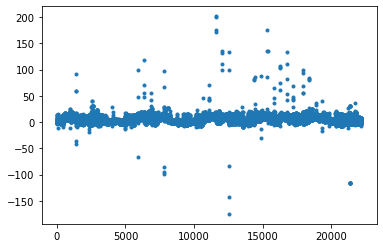

In [432]:
plt.plot(df.time_delta,df.num_crimes - preds,'.')

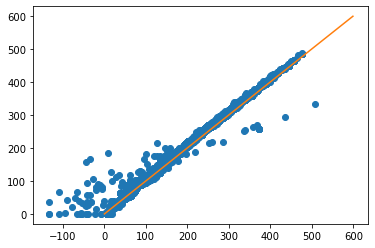

In [433]:
plt.plot(preds,df.num_crimes,'o')
xr = np.arange(0,600)
plt.plot(xr,xr)

In [434]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df.num_crimes,preds)

99.4354876523041

In [435]:
df.time_delta.values

array([    0,     1,     2, ..., 22188, 22189, 22190])

In [436]:
from scipy.stats import binned_statistic
s, edges, _ = binned_statistic(df.time_delta.values,df.num_crimes, statistic='median')

In [437]:
xr = np.arange(len(df)+1)

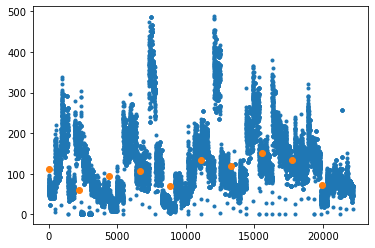

In [438]:
plt.plot(df.time_delta,df.num_crimes,'.')
plt.plot(edges[:-1],s,'o')

In [439]:
from scipy.stats import binned_statistic
s, edges, _ = binned_statistic(df.time_delta.values,df.num_crimes - preds, statistic='mean',
                               bins = np.arange(0,max(df.time_delta),365))

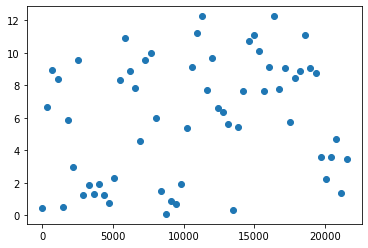

In [440]:
plt.plot(edges[:-1],s,'o')